In [3]:
import pandas as pd

In [5]:
df_benin = pd.read_csv("../data/raw/benin-malanville.csv")

In [6]:
df_benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [7]:
df_benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
df_benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [12]:
df_benin.drop(columns=['Comments'],inplace=True)

In [13]:
(df_benin[['GHI', 'DNI', 'DHI']] < 0).sum()

GHI    258847
DNI    275987
DHI    259182
dtype: int64

In [14]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
df_benin[irradiance_cols] = df_benin[irradiance_cols].clip(lower=0)

In [15]:
df_benin.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [16]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
df_benin[irradiance_cols] = df_benin[irradiance_cols].clip(lower=0)

In [17]:
df_benin.describe().loc[['min', 'max']]

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
min,0.0,0.0,0.0,0.0,0.0,11.0,2.1,0.0,0.0,0.0,0.0,0.0,985.0,0.0,0.0,9.0,8.1
max,1413.0,952.3,759.2,1342.3,1342.3,43.8,100.0,19.5,26.6,4.2,360.0,99.4,1003.0,1.0,2.5,81.0,72.5


In [18]:
duplicate_rows = df_benin.duplicated().sum()
print(duplicate_rows)

0


In [19]:
df_benin[['ModA', 'ModB', 'TModA', 'TModB']].isin([0]).sum()

ModA     245543
ModB     245975
TModA         0
TModB         0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


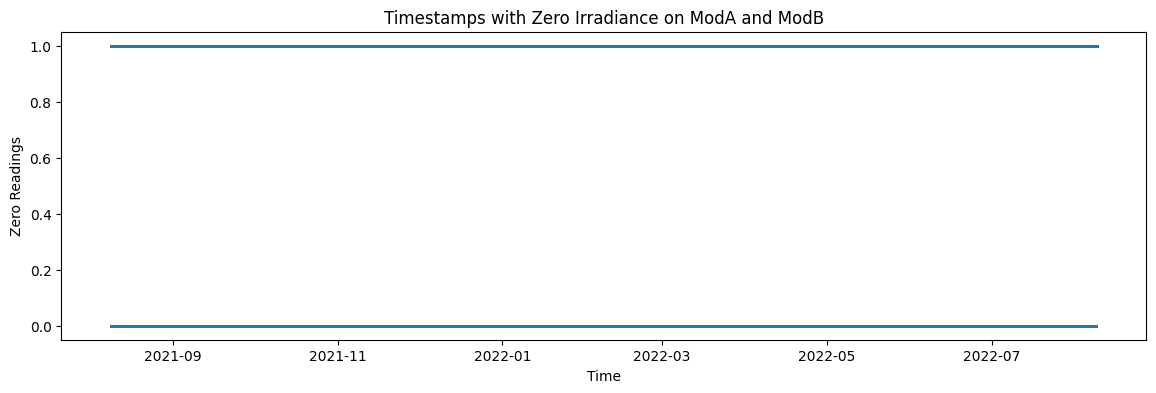

In [23]:
import matplotlib.pyplot as plt

df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp']) 
mask_zeros = (df_benin['ModA'] == 0) & (df_benin['ModB'] == 0)
plt.figure(figsize=(14,4))
plt.plot(df_benin['Timestamp'], mask_zeros, '.', markersize=1)
plt.title("Timestamps with Zero Irradiance on ModA and ModB")
plt.xlabel("Time")
plt.ylabel("Zero Readings")
plt.show()

In [22]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Extract hour from Timestamp
df_benin['Hour'] = df_benin['Timestamp'].dt.hour

# Filter only daytime hours
df_day = df_benin[(df_benin['Hour'] >= 6) & (df_benin['Hour'] <= 18)]

# Check how many zero ModA & ModB exist during the day
zero_daytime = ((df_day['ModA'] == 0) & (df_day['ModB'] == 0)).sum()
total_daytime = len(df_day)
print(f"Zero readings during daytime: {zero_daytime} out of {total_daytime}")

Zero readings during daytime: 10066 out of 284700


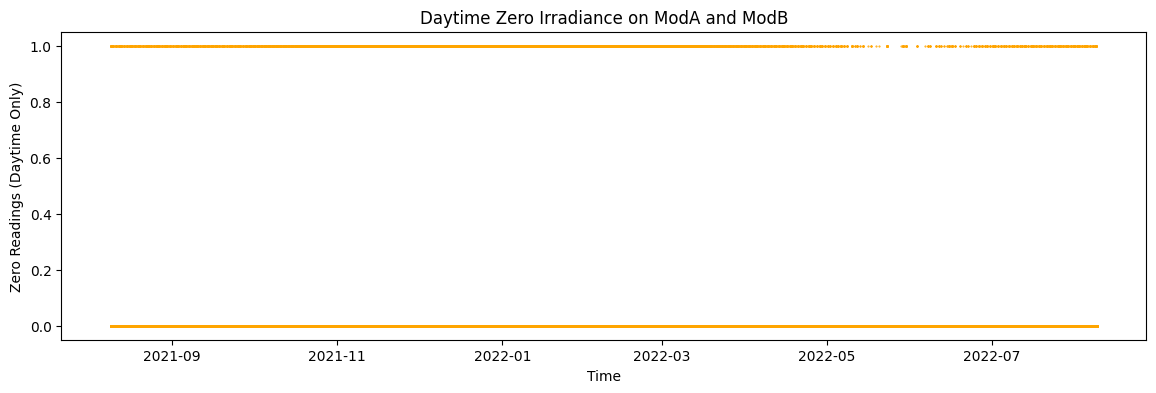

In [25]:
# Plotting daytime zero readings
mask_day_zeros = (df_day['ModA'] == 0) & (df_day['ModB'] == 0)

plt.figure(figsize=(14,4))
plt.plot(df_day['Timestamp'], mask_day_zeros, '.', markersize=1, color='orange')
plt.title("Daytime Zero Irradiance on ModA and ModB")
plt.xlabel("Time")
plt.ylabel("Zero Readings (Daytime Only)")
plt.show()

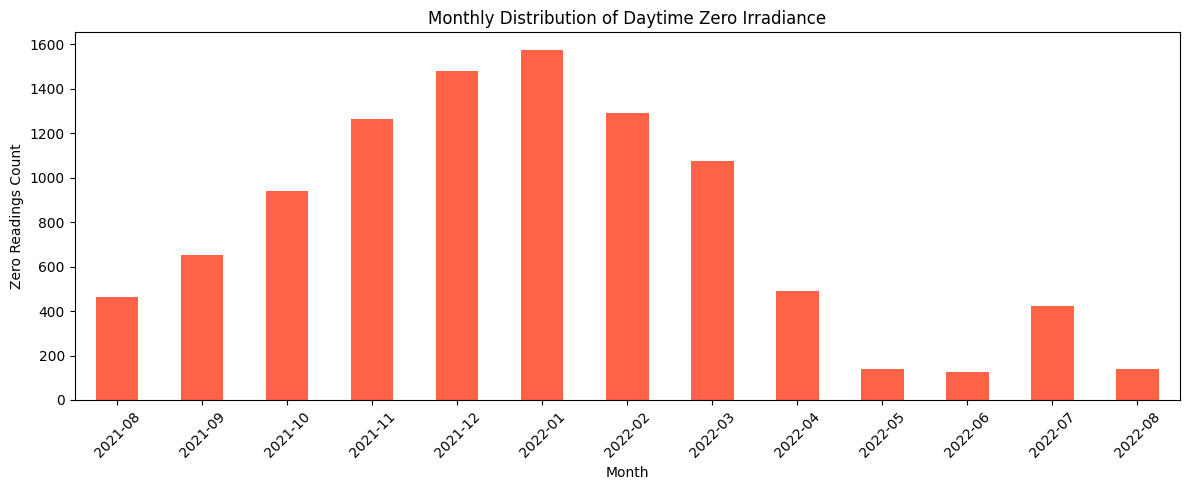

In [28]:
df_day.loc[:, 'Month'] = df_day['Timestamp'].dt.to_period('M')
zero_by_month = df_day[mask_day_zeros]['Month'].value_counts().sort_index()
zero_by_month.plot(kind='bar', figsize=(12,5), color='tomato')
plt.title("Monthly Distribution of Daytime Zero Irradiance")
plt.xlabel("Month")
plt.ylabel("Zero Readings Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

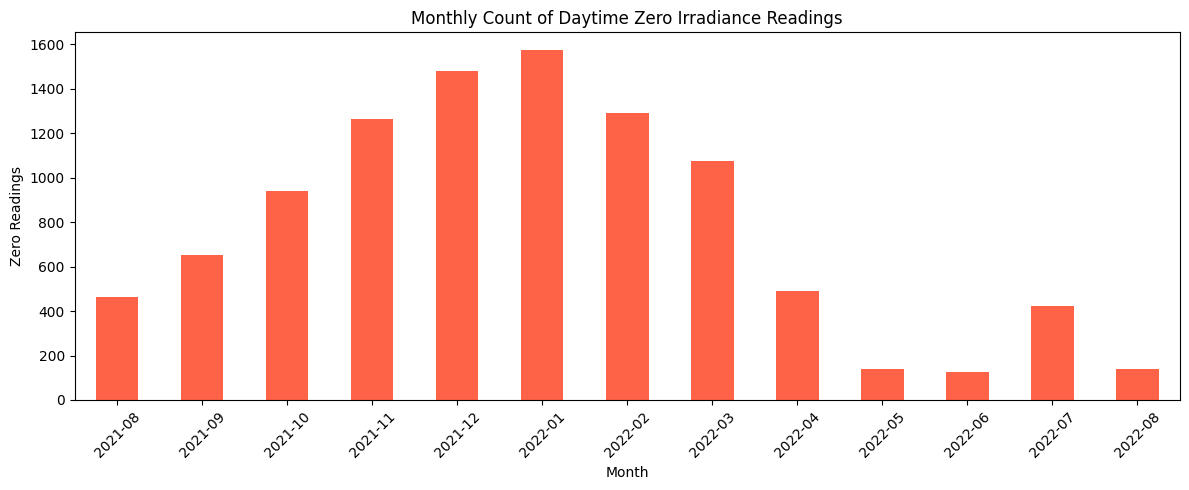

In [29]:
# Count zero irradiance entries per month
monthly_zeros = df_day[mask_day_zeros].groupby('Month').size()

# Plot
monthly_zeros.plot(kind='bar', figsize=(12, 5), color='tomato')
plt.title("Monthly Count of Daytime Zero Irradiance Readings")
plt.xlabel("Month")
plt.ylabel("Zero Readings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Shift ModA column to create the target for next-hour prediction
df_day.loc[:, 'Target_ModA'] = df_day['ModA'].shift(-1)

# Drop the last row (because it has NaN in Target_ModA after the shift)
df_day = df_day.dropna(subset=['Target_ModA'])

In [32]:
correlations = df_day.corr(numeric_only=True)['Target_ModA'].sort_values(ascending=False)
print(correlations)

Target_ModA      1.000000
ModA             0.991323
ModB             0.988914
GHI              0.980369
TModA            0.875734
DNI              0.816959
TModB            0.799797
DHI              0.685255
WDstdev          0.449319
Tamb             0.445593
WSgust           0.436819
WS               0.408190
WSstdev          0.401810
BP               0.120928
Hour             0.083236
WD               0.043568
Cleaning        -0.016366
Precipitation   -0.052049
RH              -0.377399
Name: Target_ModA, dtype: float64


In [33]:
selected_features = ['ModA', 'ModB', 'GHI', 'TModA', 'DNI', 'Target_ModA']
df_model = df_day[selected_features].dropna()
df_model.head()

,ModA,ModB,GHI,TModA,DNI,Target_ModA
359,0.0,0.0,0.0,24.3,0.0,0.0
360,0.0,0.0,0.0,24.3,0.0,0.0
361,0.0,0.0,0.0,24.3,0.0,0.0
362,0.0,0.0,0.0,24.3,0.0,0.0
363,0.0,0.0,0.0,24.3,0.0,0.0


In [35]:
df_model = df_model[~((df_model['ModA'] == 0) & (df_model['ModB'] == 0) & (df_model['GHI'] == 0) & (df_model['DNI'] == 0))]

In [41]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.3 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 3.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 4.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 4.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.7 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 5.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 5.5 MB/s eta 0:00:01
   ----------------------------------- --

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
features = ['ModA', 'ModB', 'GHI', 'TModA', 'DNI']
X = df_model[features]
y = df_model['Target_ModA']

In [44]:
features = ['ModA', 'ModB', 'GHI', 'TModA', 'DNI']
target = 'Target_ModA'

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2017.00
R² Score: 0.98


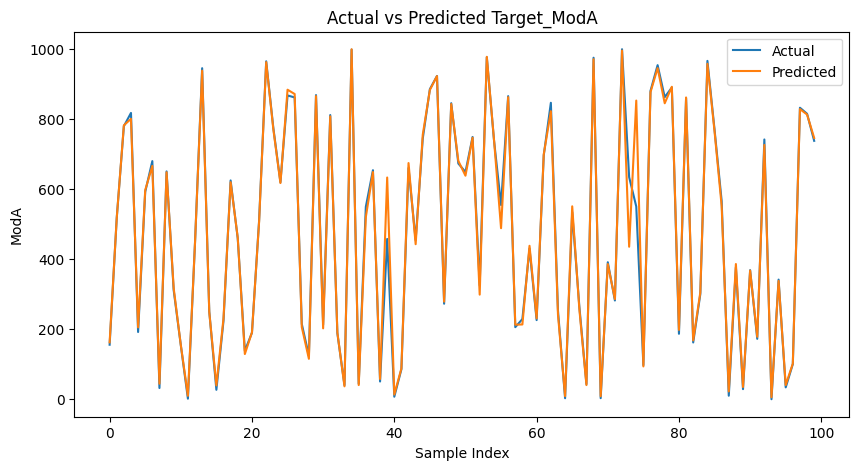

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Target_ModA')
plt.xlabel('Sample Index')
plt.ylabel('ModA')
plt.show()

In [48]:
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.2f}")

ModA: 1.10
ModB: -0.02
GHI: -0.10
TModA: 0.69
DNI: -0.02


In [49]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

Ridge()

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("R² (Random Forest):", r2_score(y_test, y_pred_rf))

R² (Random Forest): 0.9807690081349364


In [54]:
df_sierra = pd.read_csv("../data/raw/sierraleone-bumbuna.csv")

In [55]:
df_sierra.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [56]:
df_sierra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [57]:
df_sierra.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [58]:
df_model_sierra = df_sierra.drop(columns=['Timestamp', 'Comments'])

In [59]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
df_model_sierra[irradiance_cols] = df_model_sierra[irradiance_cols].clip(lower=0)

In [60]:
df_model_sierra = df_model_sierra[~((df_model_sierra['ModA'] == 0) &  (df_model_sierra['ModB'] == 0) & (df_model_sierra['GHI'] == 0) & (df_model_sierra['DNI'] == 0))]

In [63]:
df_model_sierra.isna().sum()

GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [65]:
df_model_sierra.to_csv("../data/processed/sierra_cleaned.csv", index=False)

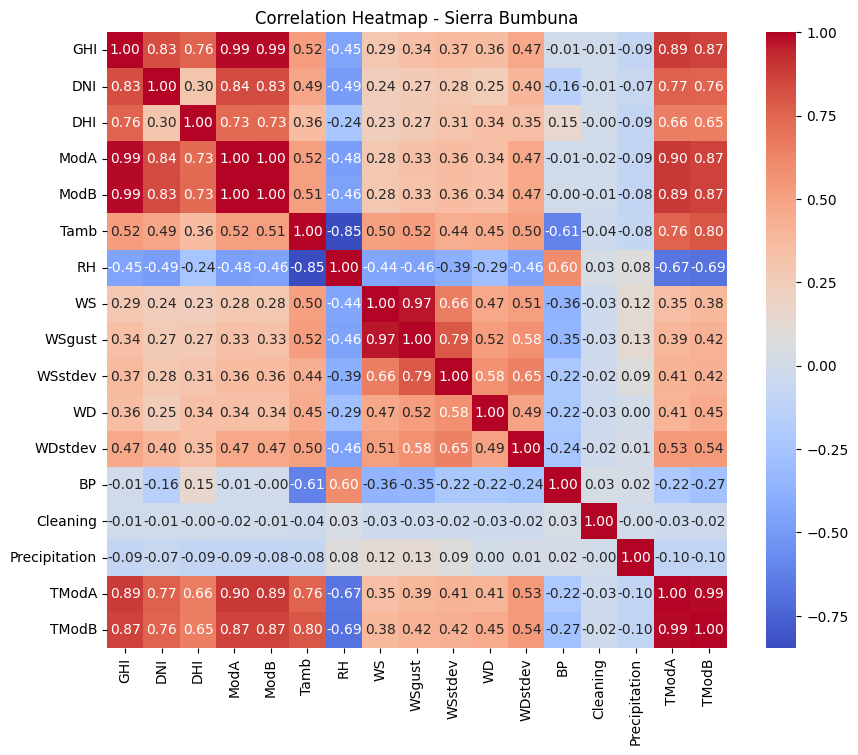

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_model_sierra.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - Sierra Bumbuna")
plt.show()

In [68]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [70]:
import matplotlib.pyplot as plt

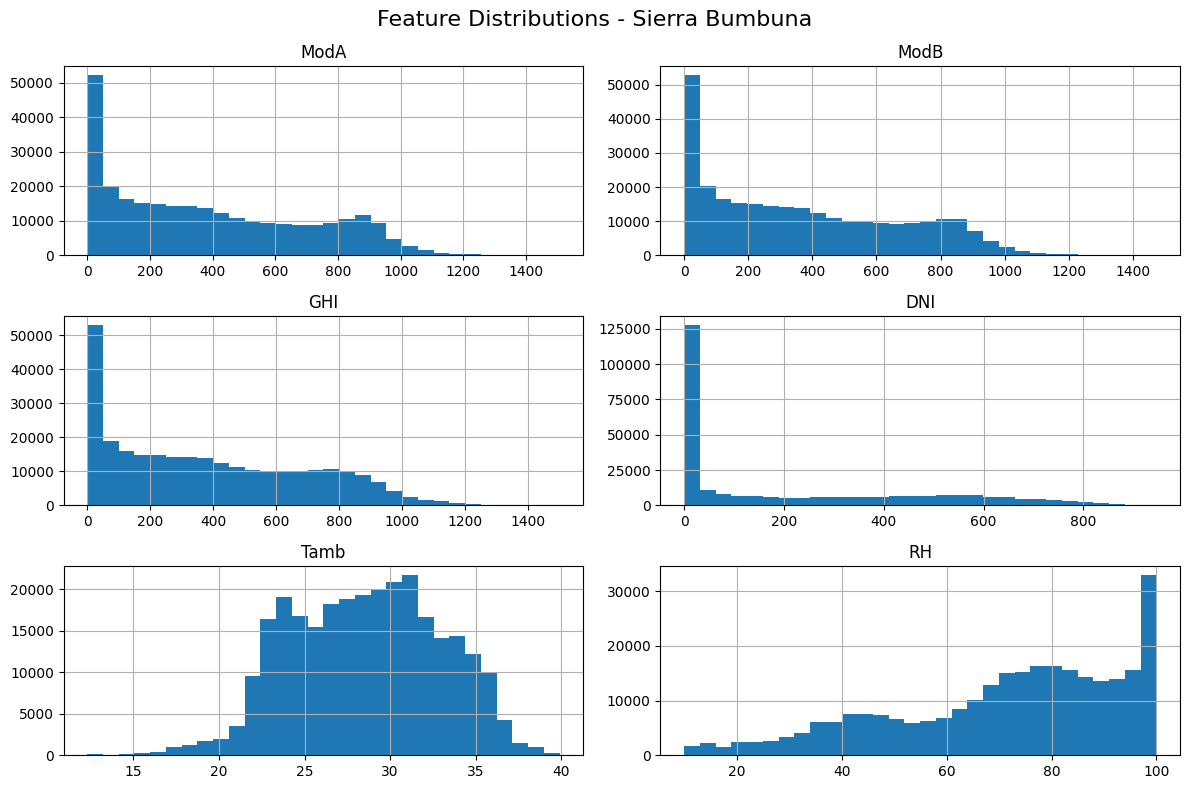

In [71]:
df_model_sierra[['ModA', 'ModB', 'GHI', 'DNI', 'Tamb', 'RH']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions - Sierra Bumbuna", fontsize=16)
plt.tight_layout()
plt.show()

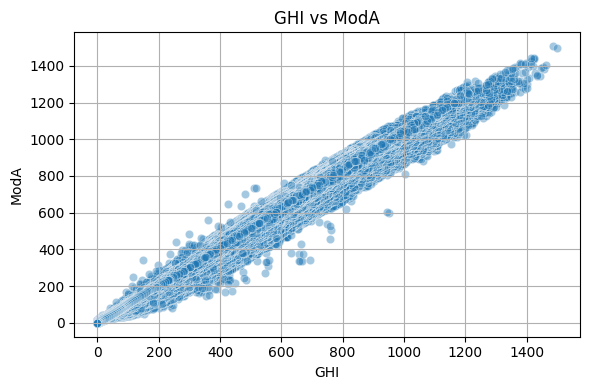

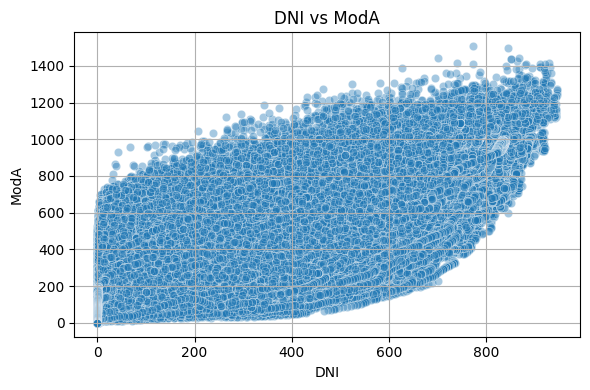

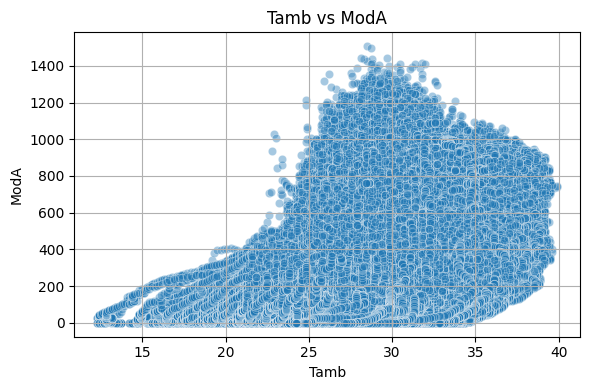

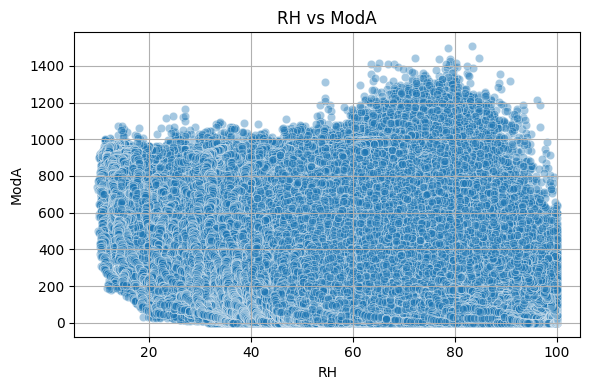

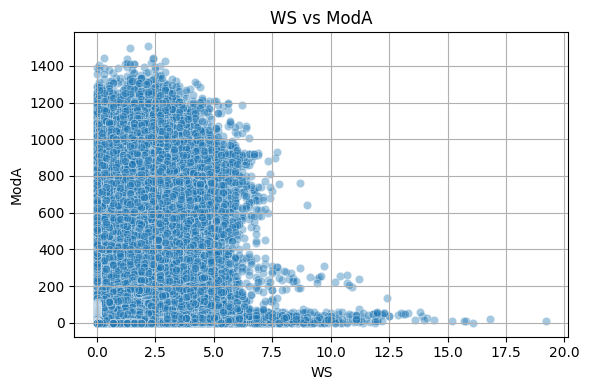

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['GHI', 'DNI', 'Tamb', 'RH', 'WS']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_model_sierra, x=feature, y='ModA', alpha=0.4)
    plt.title(f'{feature} vs ModA')
    plt.xlabel(feature)
    plt.ylabel('ModA')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [75]:
df_togo = pd.read_csv("../data/raw/togo-dapaong_qc.csv")
df_togo.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [76]:
df_togo = df_togo.drop(columns=["Timestamp", "Comments"])

In [77]:
irradiance_cols = ["GHI", "DNI", "DHI"]
df_togo[irradiance_cols] = df_togo[irradiance_cols].clip(lower=0)

In [78]:
df_togo = df_togo[~((df_togo["ModA"] == 0) & (df_togo["ModB"] == 0))]

In [79]:
df_togo = df_togo[~((df_togo["ModA"] == 0) & (df_togo["ModB"] == 0))]

In [80]:
df_togo.isna().sum()

GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [81]:
df_togo.to_csv("../data/processed/togo-dapaong-cleaned.csv", index=False)

In [ ]:
df_benin.csv("../data/processed/benin-cleaned.csv", index=F)